In [15]:
import numpy as np
from dezero import Variable
import dezero.functions as F
import matplotlib.pyplot as plt

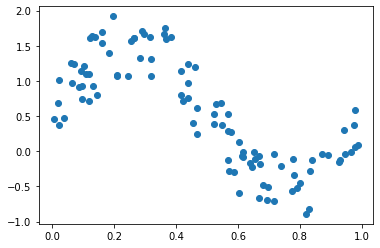

In [16]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

plt.scatter(x, y)

In [17]:
# 가중치 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

In [18]:
# 추론 함수
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

In [19]:
lr = 0.2
iters = 20000

In [20]:
# 학습
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0: # 1000회마다 출력
        print(loss)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.24759485466749875)
variable(0.2378612044705482)
variable(0.21222231333102937)
variable(0.16742181117834185)
variable(0.0968193261999268)
variable(0.07849528290602337)
variable(0.07749729552991154)
variable(0.07722132399559314)
variable(0.07698661032692944)
variable(0.07677496339867407)
variable(0.07658271141330997)
variable(0.07640719228812222)
variable(0.07624632377852585)
variable(0.07609843292673371)
variable(0.08054384817965123)
variable(0.07600114468051956)
variable(0.11023109808281673)
variable(0.07588735581940895)


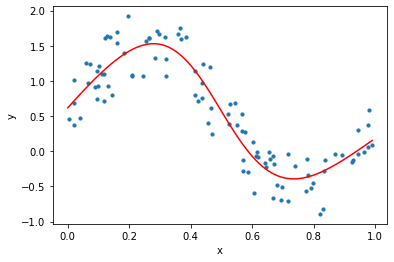

In [22]:
# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()